In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
import plotly.express as px
import statsmodels

In [47]:
# Завдання 1
#1. Прочитайте CSV файл

file = "Global YouTube Statistics.csv"

df = pd.read_csv(file, encoding='latin1')

In [48]:
#2. Виведіть перші п'ять рядків

df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [49]:
# 3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів.

print("Розміри датасету:", df.shape)
print("\nПропуски:\n", df.isna().sum())
print("\nДублікати:", df.duplicated().sum())

Розміри датасету: (995, 28)

Пропуски:
 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month       

In [50]:
# 4. Якщо є пропуски, замінить тип даних на float і середнє значення за стовпцем.

for i in df.columns:
    if df[i].dtype == float or df[i].dtype == int:
        df[i].fillna(df[i].mean(), inplace=True)
        df[i] = df[i].astype(float)

In [51]:
#5. Ще раз перевірте кількість пропусків.

df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                5
created_date 

In [52]:
#6. Перевірте, скільки унікальних країн представлено у колонці "Country"
print(f"""Amount of unique countries: {df['Country'].nunique()}""")

Amount of unique countries: 49


<Axes: title={'center': 'Distribution of views'}, ylabel='Frequency'>

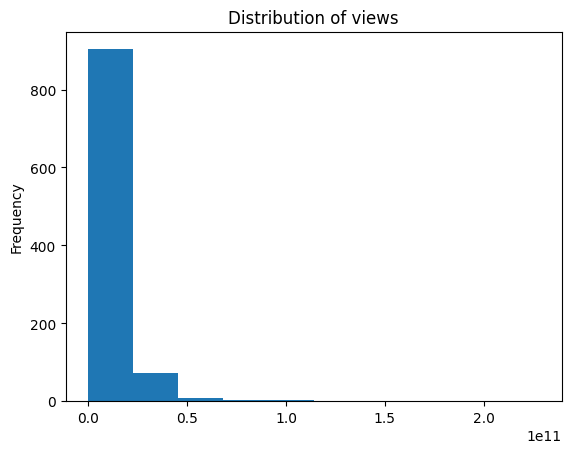

In [53]:
# 7. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):

df["video views"].plot(kind="hist", title="Distribution of views") 

In [54]:
#8. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)

max = df["video views"].max()
min = df["video views"].min()
mean = df["video views"].mean()
print(f"The maximal number of views: {max}\nThe minimal: {min}\nAnd the mean number: {mean}")

The maximal number of views: 228000000000.0
The minimal: 0.0
And the mean number: 11039537052.03819


In [55]:
# 9. Знайдіть країну, де найбільше відео було завантажено на YouTube

country = df["Country"].value_counts().idxmax()
print(f"In {country} was uploaded the biggest amount of videos")

In United States was uploaded the biggest amount of videos


In [56]:
# 10. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.

title_max = df.loc[df["uploads"].idxmax()]["Title"] 
title_min = df.loc[df["uploads"].idxmin()]["Title"]

print(f"Channel with the biggest upload amount: {title_max}\nChannel with the smallest upload amount: {title_min}")

Channel with the biggest upload amount: ABP NEWS
Channel with the smallest upload amount: Music


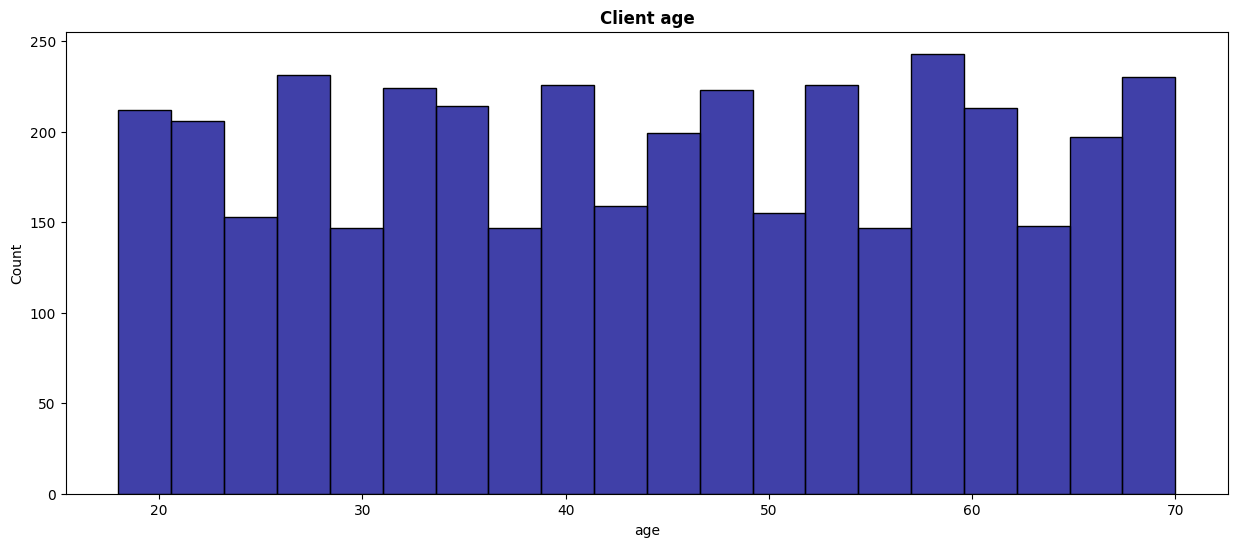

In [57]:
# Завдання 2.
# 1.Побудуйте гістограму віку клієнтів, використовуючи Seaborn.

df = pd.read_csv("shopping_trends.csv")
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

plt.figure(figsize=(15, 6))

sns.histplot(df["age"], bins=20, color="darkblue")

plt.title("Client age", fontweight="bold")
plt.show()

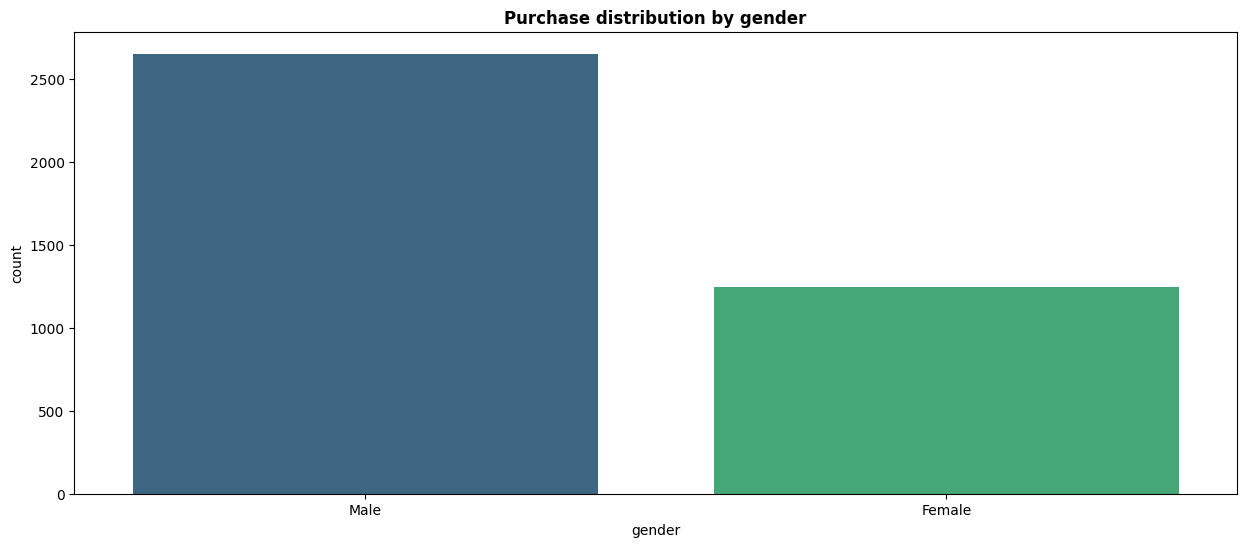

In [58]:
# 2.Порівняння розподілу покупок за статтею (item_purchased):

plt.figure(figsize=(15, 6))


sns.countplot(data=df, x="gender", hue="gender", palette="viridis")

plt.title("Purchase distribution by gender", fontweight="bold")
plt.show()

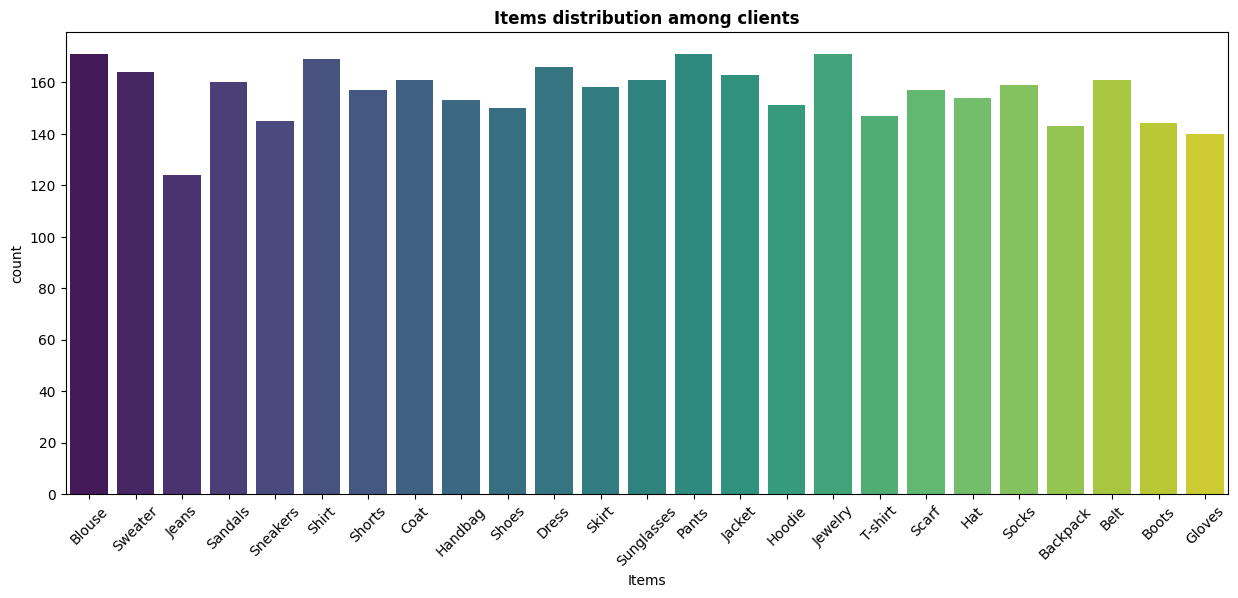

In [59]:
# 3.Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які 
# товари покупають клієнти найчастіше

plt.figure(figsize=(15, 6))

sns.countplot(data=df, x="item_purchased", hue="item_purchased", palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Items")
plt.title("Items distribution among clients", fontweight="bold")
plt.show()

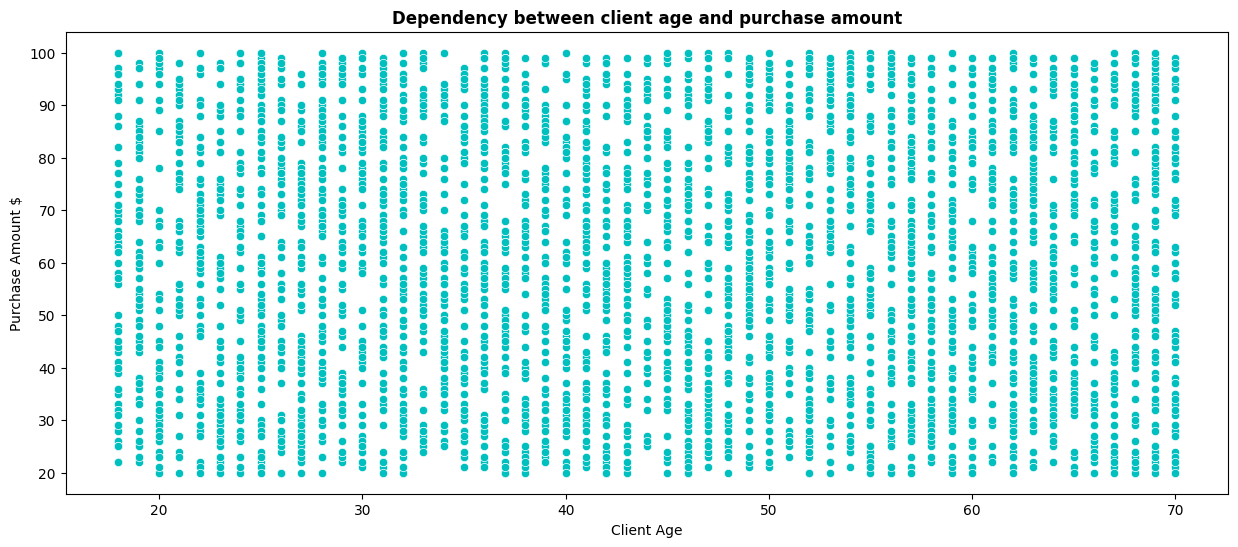

In [60]:
# 4.Залежність між віком та сумою покупок (purchase_amount):
# 5.Використовуйте scatter plot, щоб візуалізувати залежність між віком та сумою покупок.

plt.figure(figsize=(15, 6))

sns.scatterplot(data=df, x="age", y="purchase_amount_(usd)", color="c", marker="o")

plt.title("Dependency between client age and purchase amount", fontweight="bold")
plt.xlabel("Client Age")
plt.ylabel("Purchase Amount $")
plt.show()

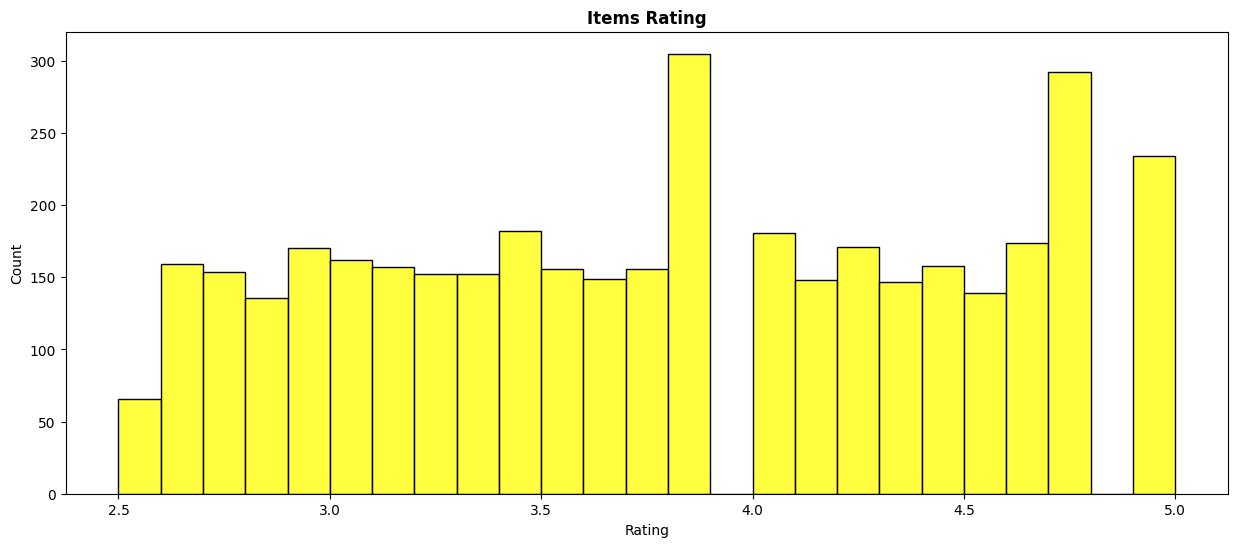

In [61]:
# 6.Графік розподілу оцінок товарів (review_rating):
# 7.Побудуйте графік розподілу оцінок товарів для оцінки якості.

plt.figure(figsize=(15, 6))

sns.histplot(df["review_rating"] , color='yellow', bins=25)

plt.xlabel("Rating")
plt.title("Items Rating", fontweight="bold")
plt.show()

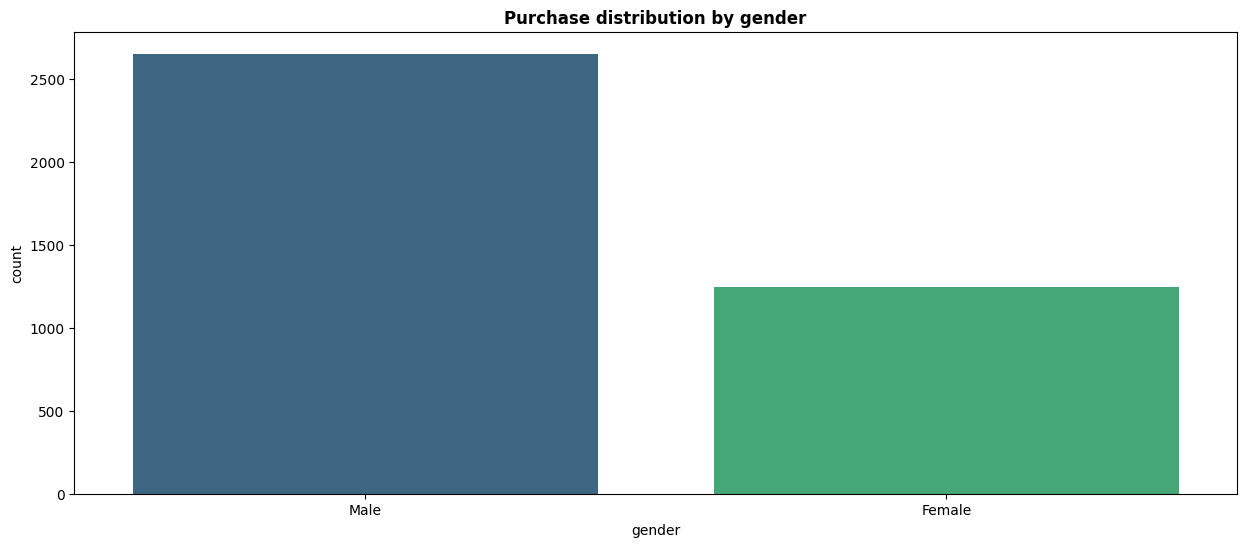

In [62]:
# 8.Категоріальна діаграма для статі (gender):
# 9.Створіть категоріальну діаграму, щоб відобразити розподіл покупок за статтею.

plt.figure(figsize=(15, 6))


sns.countplot(data=df, x="gender", hue="gender", palette="viridis")

plt.title("Purchase distribution by gender", fontweight="bold")
plt.show()

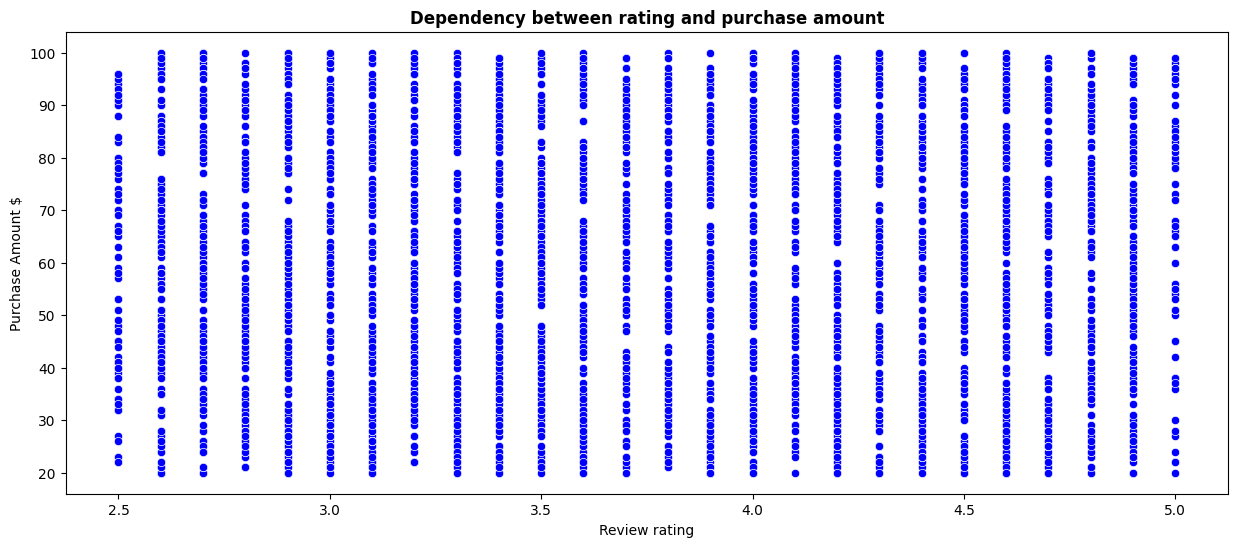

In [63]:
# 10.Залежність між рейтингом і сумою покупок (review_rating і purchase_amount)

plt.figure(figsize=(15, 6))

sns.scatterplot(data=df, x="review_rating", y="purchase_amount_(usd)", color="b", marker="o")

plt.title("Dependency between rating and purchase amount", fontweight="bold")
plt.xlabel("Review rating")
plt.ylabel("Purchase Amount $")
plt.show()

In [64]:
# Завдання 3
# 1. Створіть горизонтальну діаграму з мітками на основі даних про 
# врожайність пшениці (data.wheat()) за допомогою бібліотеки Altair. 
# Задайте вісь x для врожайності пшениці, вісь y для років, а текстові 
# мітки відображайте значення врожайності пшениці на відповідних 
# роках.

wheat_data = data.wheat()

bars = alt.Chart(wheat_data).mark_bar().encode(
    x=alt.X('wheat:Q', axis=alt.Axis(title='Wheat Yield ( in Million Tons)')),
    y=alt.Y('year:O', axis=alt.Axis(title='Year')),
    color=alt.Color('wheat:Q', scale=alt.Scale(scheme='reds'), title='Wheat Yield')
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3 
).encode(
    text='wheat:Q'
)

chart = (bars + text).properties(
    title='Wheat Yield by Year',
    width=900,
)

chart

alt.LayerChart(...)

In [65]:
# 2. Створіть багатошарову діаграму на основі даних про виробництво 
# електроенергії в штаті Айова (data.iowa_electricity()) за допомогою 
# бібліотеки Altair . Вісь x представляє роки, вісь y відображає чисте 
# виробництво електроенергії (net_generation), а кожен шар діаграми 
# позначає різні джерела енергії (source). Встановіть прозорість (opacity) 
# для стовпців на рівні 0.7.

iowa_electricity_data = data.iowa_electricity()

chart = alt.Chart(iowa_electricity_data).mark_bar(opacity=0.7).encode(
    x=alt.X('year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('net_generation:Q', axis=alt.Axis(title='Clean Electricity Generation')), 
    color=alt.Color('source:N', legend=alt.Legend(title='Energy Source')) 
).properties(
    title='Power Generation in Iowa',
    width=900
)

chart

alt.Chart(...)

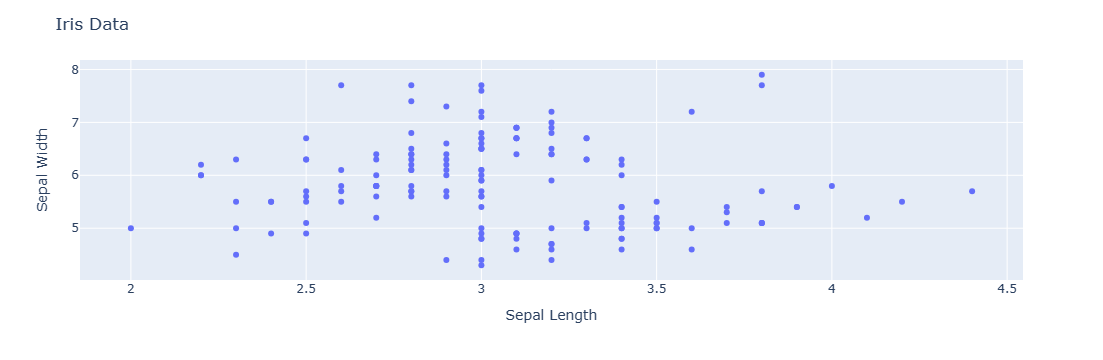

In [66]:
# 3. Створіть графік за допомогою бібліотеки Plotly (scatter plot) для даних 
# ірисів (iris dataset), де:
# Вісь X (x-axis) відповідає ширині чашелистика (sepal width).
# Вісь Y (y-axis) відповідає довжині чашелистика (sepal length).
# Кожен пункт на графіку має розмір, який залежить від довжини 
# пелюстки (petal length).
# Кожен пункт на графіку має різний колір в залежності від виду 
# (species).
# При наведенні на пункт повинні відображатися додаткові дані, такі як 
# ширина пелюстки (petal width)

df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.update_layout(
    title="Iris Data",
    xaxis_title="Sepal Length",
    yaxis_title="Sepal Width",
)
fig.show()